# Edge Detection with Sobel, Prewitt, and Roberts Filters
This notebook explores the mathematical and visual behavior of three fundamental edge detection operators:
- **Sobel**
- **Prewitt**
- **Roberts**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Function to plot a 3D graph to visualize the gradients

In [34]:
def plot_3d_surface(array_2d, ax, title="3D Surface Plot", cmap="viridis"):
    """
    Plots a 2D NumPy array as a 3D surface on the given Axes3D object.

    Parameters:
    - array_2d: 2D NumPy array (grayscale image or gradient)
    - ax: Matplotlib 3D axes object to plot on
    - title: Title of the plot
    - cmap: Color map to use (e.g., 'viridis', 'gray', 'plasma')
    """
    x = np.arange(array_2d.shape[1])
    y = np.arange(array_2d.shape[0])
    x, y = np.meshgrid(x, y)

    ax.plot_surface(x, y, array_2d, cmap=cmap, edgecolor='k', linewidth=0.2, antialiased=True)
    ax.set_title(title, fontsize=8)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Intensity")


### Testing

In [35]:
image_5x5 = [
  [ 10,  10,  10,  10,  10],
  [ 10, 255, 255, 255,  10],
  [ 10, 255, 100, 255,  10],
  [ 10, 255, 255, 255,  10],
  [ 10,  10,  10,  10,  10]
]

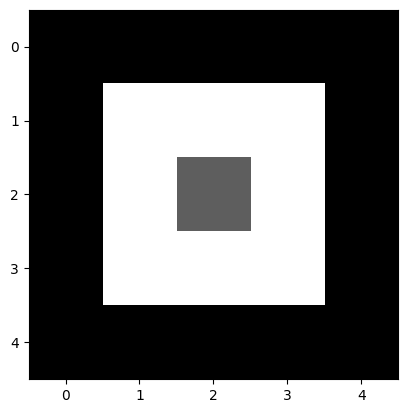

In [36]:
plt.imshow(image_5x5, cmap='gray')

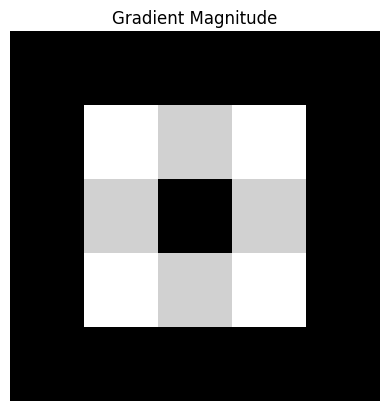

In [37]:
# Define Sobel filters
Sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

Sobel_y = np.array([[ 1,  2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Compute Gradient using Hardman Product of Sobel filters
def compute_gradient(image, sobel_x, sobel_y):
    gradient_x = np.zeros_like(image, dtype=float)
    gradient_y = np.zeros_like(image, dtype=float)

    # Apply Sobel filters
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            region = image[i-1:i+2, j-1:j+2]
            gradient_x[i, j] = np.sum(region * sobel_x)
            gradient_y[i, j] = np.sum(region * sobel_y)

    return gradient_x, gradient_y

# Convert image to numpy array
image_5x5_np = np.array(image_5x5)
# Compute gradients
gradient_x, gradient_y = compute_gradient(image_5x5_np, Sobel_x, Sobel_y)
# Compute magnitude of gradient
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
# Display the gradient magnitude
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()



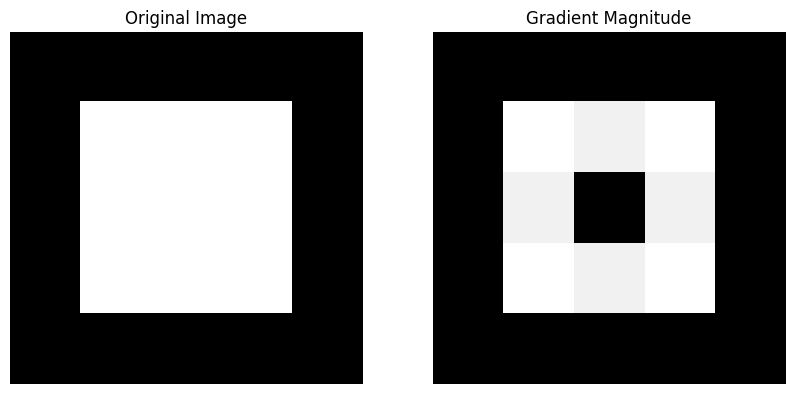

In [38]:
image_5x5_2 = [
  [ 10,  10,  10,  10,  10],
  [ 10, 255, 255, 255,  10],
  [ 10, 255, 255, 255,  10],
  [ 10, 255, 255, 255,  10],
  [ 10,  10,  10,  10,  10]
]

# Convert image to numpy array
image_5x5_np_2 = np.array(image_5x5_2)
# Compute gradients
gradient_x, gradient_y = compute_gradient(image_5x5_np_2, Sobel_x, Sobel_y)
# Compute magnitude of gradient
gradient_magnitude_2 = np.sqrt(gradient_x**2 + gradient_y**2)
#Compare original image and the gradient of the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_5x5_np_2, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude_2, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()




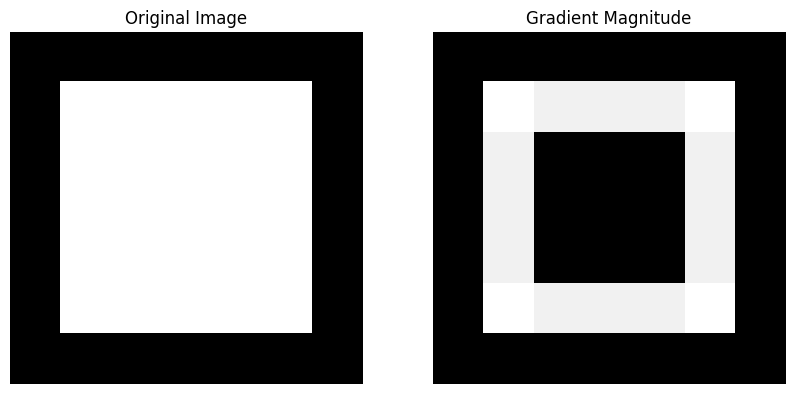

In [39]:
image_7x7 = [
    [ 10,  10,  10,  10,  10,  10,  10],
    [ 10, 255, 255, 255, 255, 255,  10],
    [ 10, 255, 255, 255, 255, 255,  10],
    [ 10, 255, 255, 255, 255, 255,  10],
    [ 10, 255, 255, 255, 255, 255,  10],
    [ 10, 255, 255, 255, 255, 255,  10],
    [ 10,  10,  10,  10,  10,  10,  10]
]
# Convert image to numpy array
image_7x7_np = np.array(image_7x7)
# Compute gradients
gradient_x, gradient_y = compute_gradient(image_7x7_np, Sobel_x, Sobel_y)
# Compute magnitude of gradient
gradient_magnitude_3 = np.sqrt(gradient_x**2 + gradient_y**2)
# Compare the original image and the gradient of the image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_7x7_np, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(gradient_magnitude_3, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')
plt.show()



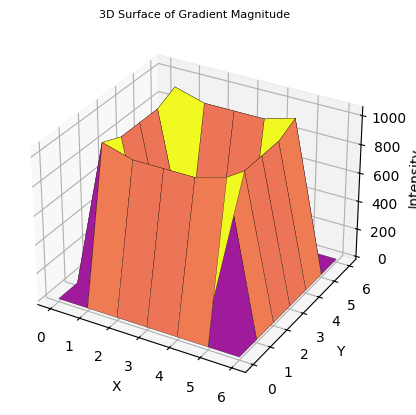

In [41]:
# Plotting the 3D surface of the gradient magnitude
ax1 = plt.figure().add_subplot(111, projection='3d')
plot_3d_surface(gradient_magnitude_3, ax=ax1, title="3D Surface of Gradient Magnitude", cmap="plasma")

### Comparing Sobel, Prewitt and Roberts filter

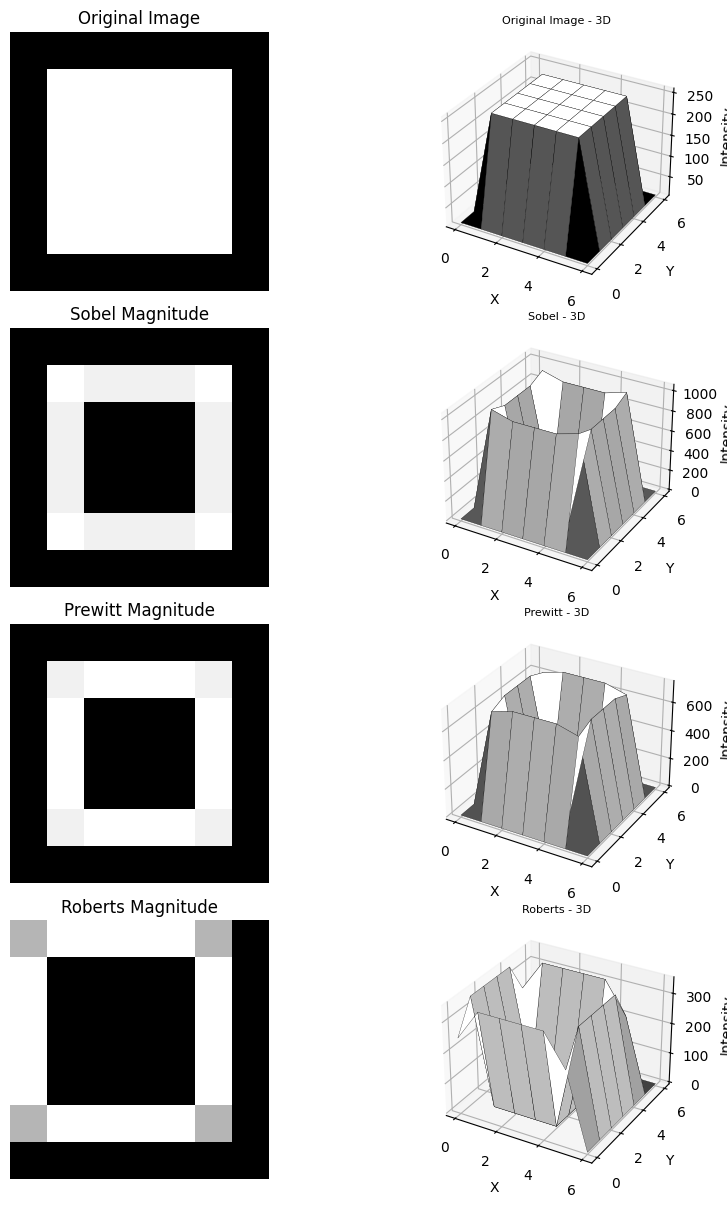

In [44]:
import numpy as np
import matplotlib.pyplot as plt

original_img = image_7x7_np

# Sobel kernels
sobel_x = np.array([[ -1, 0, 1],
                    [ -2, 0, 2],
                    [ -1, 0, 1]])
sobel_y = np.array([[ 1,  2,  1],
                    [ 0,  0,  0],
                    [-1, -2, -1]])

# Prewitt kernels
prewitt_x = np.array([[ -1, 0, 1],
                      [ -1, 0, 1],
                      [ -1, 0, 1]])
prewitt_y = np.array([[ 1,  1,  1],
                      [ 0,  0,  0],
                      [-1, -1, -1]])

# Roberts kernels (note: 2x2 filter, handled separately)
roberts_x = np.array([[1, 0],
                      [0, -1]])
roberts_y = np.array([[0, 1],
                      [-1, 0]])

# Compute gradients
sobel_gx, sobel_gy = compute_gradient(image_7x7_np, sobel_x, sobel_y)
sobel_magnitude = np.sqrt(sobel_gx**2 + sobel_gy**2)

prewitt_gx, prewitt_gy = compute_gradient(image_7x7_np, prewitt_x, prewitt_y)
prewitt_magnitude = np.sqrt(prewitt_gx**2 + prewitt_gy**2)

roberts_magnitude = np.zeros_like(image_7x7_np, dtype=float)
for i in range(image_7x7_np.shape[0] - 1):
    for j in range(image_7x7_np.shape[1] - 1):
        region = image_7x7_np[i:i+2, j:j+2]
        gx = np.sum(region * roberts_x)
        gy = np.sum(region * roberts_y)
        roberts_magnitude[i, j] = np.sqrt(gx**2 + gy**2)

# Plot all in a 4x2 grid (2D + 3D for each)
fig = plt.figure(figsize=(10, 12))

# 2D plots
ax1 = fig.add_subplot(4, 2, 1)
ax1.imshow(original_img, cmap='gray')
ax1.set_title("Original Image")
ax1.axis("off")

ax3 = fig.add_subplot(4, 2, 3)
ax3.imshow(sobel_magnitude, cmap='gray')
ax3.set_title("Sobel Magnitude")
ax3.axis("off")

ax5 = fig.add_subplot(4, 2, 5)
ax5.imshow(prewitt_magnitude, cmap='gray')
ax5.set_title("Prewitt Magnitude")
ax5.axis("off")

ax7 = fig.add_subplot(4, 2, 7)
ax7.imshow(roberts_magnitude, cmap='gray')
ax7.set_title("Roberts Magnitude")
ax7.axis("off")

# 3D plots
ax2 = fig.add_subplot(4, 2, 2, projection='3d')
plot_3d_surface(original_img, ax2, title="Original Image - 3D", cmap='gray')

ax4 = fig.add_subplot(4, 2, 4, projection='3d')
plot_3d_surface(sobel_magnitude, ax4, title="Sobel - 3D", cmap='gray')

ax6 = fig.add_subplot(4, 2, 6, projection='3d')
plot_3d_surface(prewitt_magnitude, ax6, title="Prewitt - 3D", cmap='gray')

ax8 = fig.add_subplot(4, 2, 8, projection='3d')
plot_3d_surface(roberts_magnitude, ax8, title="Roberts - 3D", cmap='gray')

plt.tight_layout()
plt.show()
